<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#package" data-toc-modified-id="package-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>package</a></span></li><li><span><a href="#function" data-toc-modified-id="function-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>function</a></span></li><li><span><a href="#main" data-toc-modified-id="main-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>main</a></span><ul class="toc-item"><li><span><a href="#get-clean-raw-data" data-toc-modified-id="get-clean-raw-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>get clean raw data</a></span></li><li><span><a href="#clean-up-docs" data-toc-modified-id="clean-up-docs-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>clean up docs</a></span></li><li><span><a href="#save-clean-doc" data-toc-modified-id="save-clean-doc-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>save clean doc</a></span></li></ul></li><li><span><a href="#test" data-toc-modified-id="test-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>test</a></span></li><li><span><a href="#end" data-toc-modified-id="end-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>end</a></span></li></ul></div>

In [1]:
## Pre-setting
# if one module is changed, this line will automatically reload that module
%load_ext autoreload
%autoreload 2
# display the figure in the notebook
%matplotlib inline
# To change the font size in acrobat
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

%load_ext memory_profiler

## package

In [2]:
import os
import sys
curr_folder = os.path.dirname(__file__) if '__file__' in dir() else os.path.abspath('')
src_dir = os.path.abspath(os.path.join(curr_folder, os.pardir, 'src'))
if src_dir not in sys.path: sys.path.insert(0, src_dir)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
## System package
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd
pd.options.display.max_columns = 500
# pd.options.display.max_rows = 500

In [5]:
from nltk.tokenize import  word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import json

## function

## main

### get clean raw data

In [6]:
clean_data_dir = os.path.abspath(os.path.join(os.pardir, 'data', 's2021_lumen_clean_data'))
clean_data_file = 's2021_05_23_01_lumen_clean_data.csv'
clean_data_path = os.path.join(clean_data_dir, clean_data_file)

In [7]:
clean_df = pd.read_csv(clean_data_path)

clean_df

,raw_text_id,raw_text,text_type,Authority or Expertise/Source Credibility,Blame/guilt,Commitment,Commitment- Call to Action,Commitment- Indignation,Emphasis,Gain framing,Liking,Loss framing,Objectivity,Reciprocation,Scarcity/Urgency/Opportunity,Social Proof,Social Proof- Admonition,Subjectivity
0,0,"""A Baker Swept By,"" by Edward Hirsch Audio: Re...",news left,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,"""Get Out"" Won’t Have A 100% Rating On Rotten T...",news left,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1
2,2,"""I wish you are still alive to see what Americ...",russian ad,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,3,"""Know Your Rights or Your Safety Is At Risk In...",russian ad,0,1,1,1,1,1,0,0,0,1,0,0,1,1,1
4,4,"""Nancy Pelosi was drunk again today,"" begins a...",fake news,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,2993,’The View’ Co-host Joy Behar: Trump Is ’The Mo...,news right,1,1,1,1,0,0,0,0,0,0,0,1,0,1,1
2994,2994,’Will Hillary Clinton Get Prosecuted’: Most-Go...,news right,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2995,2995,’You Are Amazing!’ Donald Trump Wrote To Harry...,news left,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2996,2996,“Purple Rain” Is Returning To Theaters In Trib...,news left,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0


### clean up docs

In [8]:
eng_stopword = stopwords.words('english')
eng_stopword[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [9]:
ps = PorterStemmer()

In [10]:
%%time

nostop_stem_docs = []
nostop_stem_doc_lens = []

clean_docs = []
clean_doc_lens = []

for tmp_doc in clean_df.raw_text:
    tmp_doc_lower = tmp_doc.lower().replace('\\n', ' ').replace('\\xa0', ' ')
    
    tmp_doc_lower_nopun = tmp_doc_lower.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
    tmp_word_token_list = word_tokenize(tmp_doc_lower_nopun)
    tmp_word_list = [ps.stem(j) for j in tmp_word_token_list if len(j) > 2 if j not in eng_stopword if j.isalpha()]
    
    
    
    nostop_stem_docs.append(' '.join(tmp_word_list))
    nostop_stem_doc_lens.append(len(tmp_word_list))
    
    tmp_clean_doc_words = [j for j in tmp_word_token_list if j.isalpha()]
    clean_docs.append(' '.join(tmp_clean_doc_words))
    clean_doc_lens.append(len(tmp_clean_doc_words))
 

Wall time: 9.06 s


In [11]:
clean_df.raw_text[0]

'"A Baker Swept By," by Edward Hirsch Audio: Read by the author. , You were already losing your eyesight last winter in Rome when you paused in the doorway at nine o\'clock on a Saturday morning and a baker swept by on a shiny bicycle waving a cap and singing under his breath, you didn\'t know bakers wore white aprons dusted with flour and floated around the city like angels on a freshly baked day, you weren\'t sure why morning halted up and down the street as you stood in the doorway and a baker winged by on a weekend morning so new and pristine that you looked into the sky and for one undiminished instant of misplaced time you saw brightness, brightness everywhere, before a shadow crossed the rooftops and it was blotted out.'

In [12]:
clean_docs[0]

'a baker swept by by edward hirsch audio read by the author you were already losing your eyesight last winter in rome when you paused in the doorway at nine o clock on a saturday morning and a baker swept by on a shiny bicycle waving a cap and singing under his breath you didn t know bakers wore white aprons dusted with flour and floated around the city like angels on a freshly baked day you weren t sure why morning halted up and down the street as you stood in the doorway and a baker winged by on a weekend morning so new and pristine that you looked into the sky and for one undiminished instant of misplaced time you saw brightness brightness everywhere before a shadow crossed the rooftops and it was blotted out'

In [13]:
nostop_stem_docs[0]

'baker swept edward hirsch audio read author alreadi lose eyesight last winter rome paus doorway nine clock saturday morn baker swept shini bicycl wave cap sing breath know baker wore white apron dust flour float around citi like angel freshli bake day sure morn halt street stood doorway baker wing weekend morn new pristin look sky one undiminish instant misplac time saw bright bright everywher shadow cross rooftop blot'

(array([155.,  81.,  43.,  52., 207., 374., 290., 200., 248., 334., 273.,
        262., 157., 135.,  82.,  59.,  33.,   4.,   3.,   3.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.        ,   8.43333333,  15.86666667,  23.3       ,
         30.73333333,  38.16666667,  45.6       ,  53.03333333,
         60.46666667,  67.9       ,  75.33333333,  82.76666667,
         90.2       ,  97.63333333, 105.06666667, 112.5       ,
        119.93333333, 127.36666667, 134.8       , 142.23333333,
        149.66666667, 157.1       , 164.53333333, 171.96666667,
        179.4       , 186.83333333, 194.26666667, 201.7       ,
        209.13333333, 216.56666667, 224.        ]),
 <BarContainer object of 30 artists>)

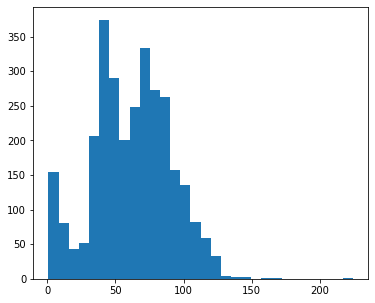

In [14]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.hist(nostop_stem_doc_lens, bins=30)

### save clean doc

In [15]:
clean_df['nostop_stem_doc'] = nostop_stem_docs
clean_df['nostop_stem_doc_len'] = nostop_stem_doc_lens

clean_df['clean_doc'] = clean_docs
clean_df['clean_doc_len'] = clean_doc_lens

In [16]:
columns = list(clean_df.columns)
columns

['raw_text_id',
 'raw_text',
 'text_type',
 'Authority or Expertise/Source Credibility',
 'Blame/guilt',
 'Commitment',
 'Commitment- Call to Action',
 'Commitment- Indignation',
 'Emphasis',
 'Gain framing',
 'Liking',
 'Loss framing',
 'Objectivity',
 'Reciprocation',
 'Scarcity/Urgency/Opportunity',
 'Social Proof',
 'Social Proof- Admonition',
 'Subjectivity',
 'nostop_stem_doc',
 'nostop_stem_doc_len',
 'clean_doc',
 'clean_doc_len']

In [17]:
columns = [
    'raw_text_id',
    'raw_text',
    'text_type',
    'nostop_stem_doc',
    'nostop_stem_doc_len',
    'clean_doc',
    'clean_doc_len',
    'Authority or Expertise/Source Credibility',
    'Blame/guilt',
    'Commitment',
    'Commitment- Call to Action',
    'Commitment- Indignation',
    'Emphasis',
    'Gain framing',
    'Liking',
    'Loss framing',
    'Objectivity',
    'Reciprocation',
    'Scarcity/Urgency/Opportunity',
    'Social Proof',
    'Social Proof- Admonition',
    'Subjectivity',

]

In [18]:
clean_df = clean_df[columns]
clean_df

,raw_text_id,raw_text,text_type,nostop_stem_doc,nostop_stem_doc_len,clean_doc,clean_doc_len,Authority or Expertise/Source Credibility,Blame/guilt,Commitment,Commitment- Call to Action,Commitment- Indignation,Emphasis,Gain framing,Liking,Loss framing,Objectivity,Reciprocation,Scarcity/Urgency/Opportunity,Social Proof,Social Proof- Admonition,Subjectivity
0,0,"""A Baker Swept By,"" by Edward Hirsch Audio: Re...",news left,baker swept edward hirsch audio read author al...,69,a baker swept by by edward hirsch audio read b...,137,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,"""Get Out"" Won’t Have A 100% Rating On Rotten T...",news left,get rate rotten tomato ever fact jordan peel g...,99,get out won t have a rating on rotten tomatoes...,194,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1
2,2,"""I wish you are still alive to see what Americ...",russian ad,wish still aliv see america turn,6,i wish you are still alive to see what america...,13,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,3,"""Know Your Rights or Your Safety Is At Risk In...",russian ad,know right safeti risk interact polic shock vi...,76,know your rights or your safety is at risk in ...,146,0,1,1,1,1,1,0,0,0,1,0,0,1,1,1
4,4,"""Nancy Pelosi was drunk again today,"" begins a...",fake news,nanci pelosi drunk today begin post recent sha...,90,nancy pelosi was drunk again today begins a po...,172,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,2993,’The View’ Co-host Joy Behar: Trump Is ’The Mo...,news right,view host joy behar trump danger man aliv mond...,70,the view co host joy behar trump is the most d...,126,1,1,1,1,0,0,0,0,0,0,0,1,0,1,1
2994,2994,’Will Hillary Clinton Get Prosecuted’: Most-Go...,news right,hillari clinton get prosecut googl hillari sea...,76,will hillary clinton get prosecuted most googl...,128,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2995,2995,’You Are Amazing!’ Donald Trump Wrote To Harry...,news left,amaz donald trump wrote harri reid letter sen ...,58,you are amazing donald trump wrote to harry re...,102,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2996,2996,“Purple Rain” Is Returning To Theaters In Trib...,news left,purpl rain return theater tribut princ purpl r...,105,purple rain is returning to theaters in tribut...,182,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0


In [19]:

cleandoc_data_file = 's2021_05_23_02_lumen_clean_doc_data.csv'
cleandoc_data_path = os.path.join(clean_data_dir, cleandoc_data_file)

In [20]:
clean_df.to_csv(cleandoc_data_path, index=False)

## test

In [21]:
1

1

## end

In [22]:
1

1